<a href="https://colab.research.google.com/github/Nadda1004/Intro_Machine_learning/blob/main/W1_D3_02_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Read in the dataset from the below link with pandas...

In [1]:
link = "https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv"


2. Show me some of the data...

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv(link)
df.head()

,height,weight,target,type
0,27.0,71.0,0.0,dog
1,27.0,92.0,0.0,dog
2,32.0,47.0,0.0,dog
3,30.0,90.0,0.0,dog
4,28.0,91.0,0.0,dog


# EDA 

In [4]:
# shape 
df.shape

(200, 4)

In [5]:
# columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  200 non-null    float64
 1   weight  200 non-null    float64
 2   target  200 non-null    float64
 3   type    200 non-null    object 
dtypes: float64(3), object(1)
memory usage: 6.4+ KB


In [6]:
# target values and number of rows
df.type.value_counts()

dog      100
horse    100
Name: type, dtype: int64

In [7]:
df.target.value_counts()

1.0    100
0.0    100
Name: target, dtype: int64

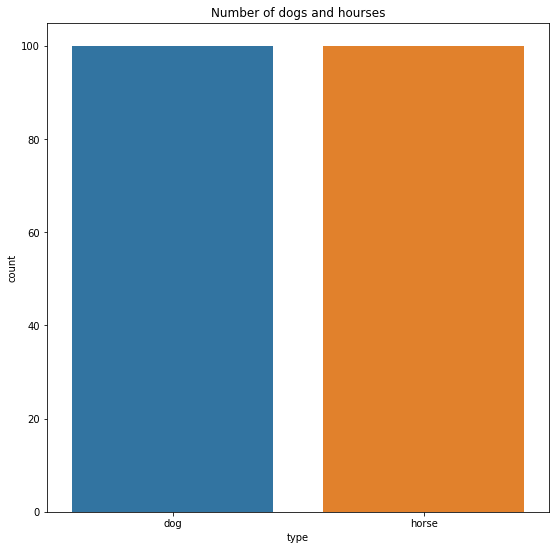

In [8]:
plt.figure(figsize=(9,9))
sns.countplot(x = df.type).set(title = 'Number of dogs and hourses');

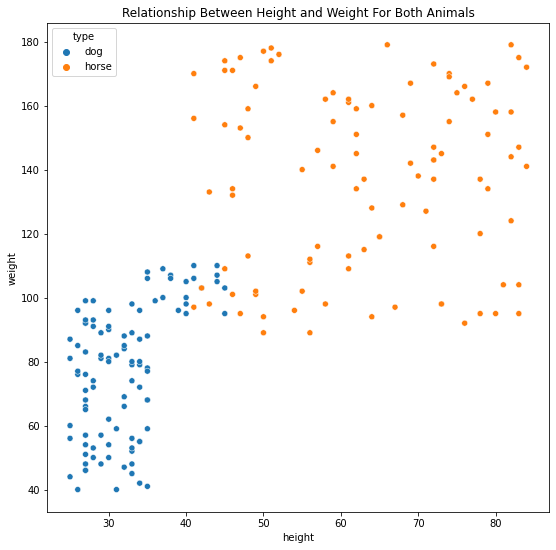

In [9]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=df.height , y = df.weight , hue=df.type).set(title = 'Relationship Between Height and Weight For Both Animals');

3. Split the data into training and testing sets ([Help](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))

In [10]:
# all the column excpet the target
x = df[['height' , 'weight']]
#just the target
y = df['target']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
X_train.shape

(140, 2)

In [13]:
X_test.shape

(60, 2)

In [14]:
y_train.shape

(140,)

In [15]:
y_test.shape

(60,)

In [16]:
X_train.head()

,height,weight
169,64.0,128.0
97,41.0,110.0
31,35.0,68.0
12,35.0,59.0
35,27.0,54.0


In [17]:
y_train.head()

169    1.0
97     0.0
31     0.0
12     0.0
35     0.0
Name: target, dtype: float64

4. Make and fit a simple logistic regression model... (you shouldn't need to change anything here)

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

5. Make some predictions...

In [19]:
model.predict(X_test)

array([0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1.])

In [20]:
# save them as variable `preds`
preds = model.predict(X_test)

6. What's the precision of the model? (Hint: Google 'sklearn precision')

In [21]:
from sklearn.metrics import *

In [22]:
precision_score(y_test ,preds)

0.9333333333333333

7. What's the recall of the model?

In [23]:
recall_score(y_test,preds)

0.9655172413793104

8. What's the mean sqared error of the model?

In [24]:
mean_squared_error(y_test, preds)

0.05

9. Run 2 different cross validations with different scoring parameters ([Help](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter))

Note: we're doing classification

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
# Accuracy
cross_val_score(model, x, y, scoring='accuracy')

array([0.95, 1.  , 1.  , 1.  , 0.6 ])

In [27]:
# F1 score for binary Target (0,1)
cross_val_score(model, x, y, scoring='f1')

array([0.94736842, 1.        , 1.        , 1.        , 0.71428571])

In [28]:
# F1 weighted score 
cross_val_score(model, x, y, scoring='f1_weighted')

array([0.94987469, 1.        , 1.        , 1.        , 0.52380952])

10. (Bonus) Throw it into a GridSearchCV... (any amount of parameters you want to test out).. of whatever you tested, what are the best parameters?

Note: You can find the possible parameters to adjust in the [LogisticRegression docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [29]:
from sklearn.pipeline import make_pipeline

def LR(**kwargs):
    return make_pipeline(LogisticRegression(**kwargs))

In [30]:
np.array([0.005])

array([0.005])

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
              'logisticregression__fit_intercept': [True, False],
              'logisticregression__solver': ['liblinear']
              }

grid = GridSearchCV(LR(), param_grid, cv=7)

In [32]:
# fit the grid
grid.fit(x, y)

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                  

In [33]:
# show me the best params
grid.best_params_

{'logisticregression__fit_intercept': True,
 'logisticregression__solver': 'liblinear'}

11. (Bonus Bonus) What's your best r2_score?

In [34]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=preds)

0.7997775305895439